# Problem from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [7]:
#    1 - fixed acidity
#    2 - volatile acidity
#    3 - citric acid
#    4 - residual sugar
#    5 - chlorides
#    6 - free sulfur dioxide
#    7 - total sulfur dioxide
#    8 - density
#    9 - pH
#    10 - sulphates
#    11 - alcohol
#    Output variable (based on sensory data): 
#    12 - quality (score between 0 and 10)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from scipy.stats import norm

In [9]:
all_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")


In [10]:
all_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
numeric=all_data.select_dtypes(include=[np.number])

In [12]:
numeric

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [13]:
corr_matrix=numeric.corr()

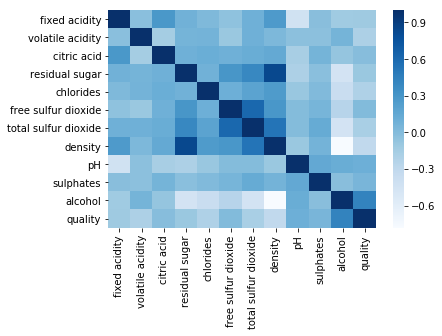

In [14]:
sns.heatmap(corr_matrix, cmap="Blues")

In [15]:
corr_matrix['quality'].sort_values()

density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
residual sugar         -0.097577
citric acid            -0.009209
free sulfur dioxide     0.008158
sulphates               0.053678
pH                      0.099427
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

In [16]:
all_data.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

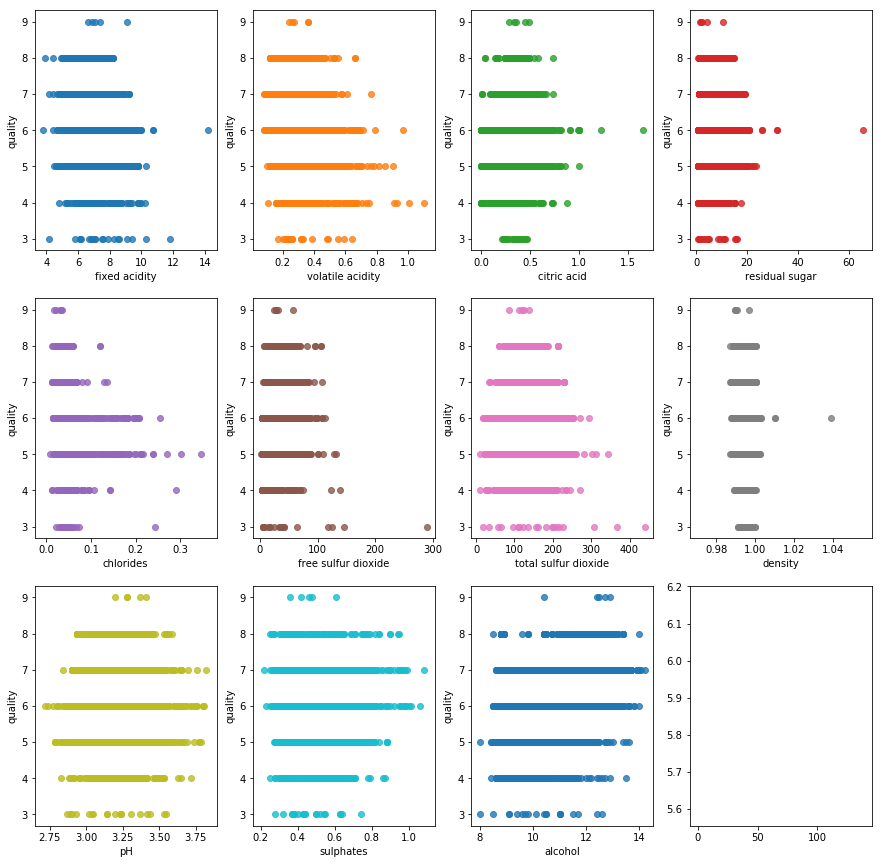

In [18]:

ig, axs = plt.subplots(ncols=4, nrows=3,figsize=(15,15))
sns.regplot(x='fixed acidity', y='quality', data=all_data, ax=axs[0][0], fit_reg=False)
sns.regplot(x='volatile acidity', y='quality', data=all_data, ax=axs[0][1], fit_reg=False)
sns.regplot(x='citric acid', y='quality', data=all_data, ax=axs[0][2], fit_reg=False)
sns.regplot(x='residual sugar', y='quality', data=all_data, ax=axs[0][3], fit_reg=False)
sns.regplot(x='chlorides', y='quality', data=all_data, ax=axs[1][0], fit_reg=False)
sns.regplot(x='free sulfur dioxide', y='quality', data=all_data, ax=axs[1][1], fit_reg=False)
sns.regplot(x='total sulfur dioxide', y='quality', data=all_data, ax=axs[1][2], fit_reg=False)
sns.regplot(x='density', y='quality', data=all_data, ax=axs[1][3], fit_reg=False)
sns.regplot(x='pH', y='quality', data=all_data, ax=axs[2][0], fit_reg=False)
sns.regplot(x='sulphates', y='quality', data=all_data, ax=axs[2][1], fit_reg=False)
sns.regplot(x='alcohol', y='quality', data=all_data, ax=axs[2][2], fit_reg=False)


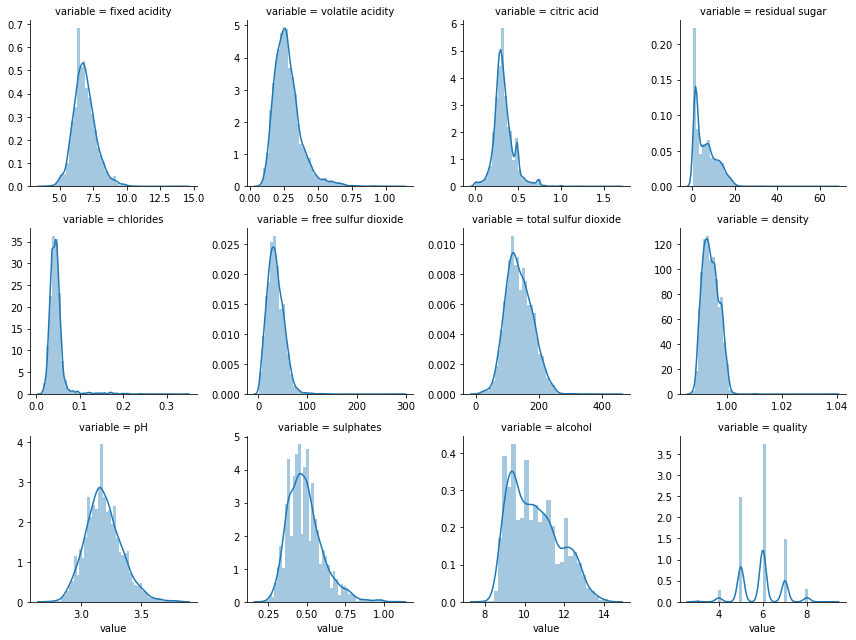

In [20]:

num = [f for f in all_data.columns if all_data.dtypes[f] != 'object']

nd = pd.melt(all_data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')


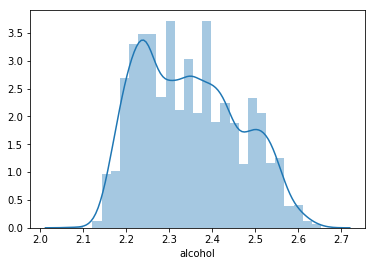

In [30]:
sns.distplot(np.log(all_data.loc[all_data['alcohol']>0, 'alcohol']))### Log transformation to check for more normal  distribution

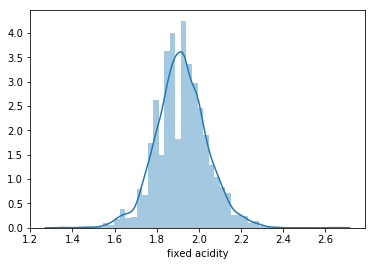

In [31]:
sns.distplot(np.log(all_data['fixed acidity']))### Log transformation to check for more normal  distribution

In [ ]:
all_data['fixed acidity']=

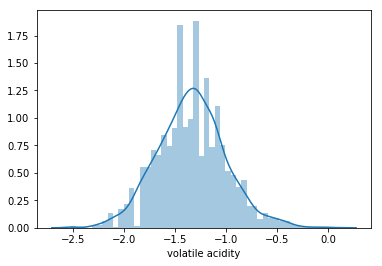

In [32]:
sns.distplot(np.log(all_data['volatile acidity']))### Log transformation to check for more normal  distribution

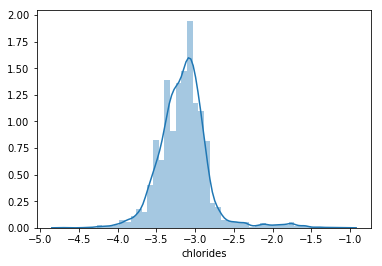

In [35]:
sns.distplot(np.log(all_data['chlorides']))### Log transformation to check for more normal  distribution

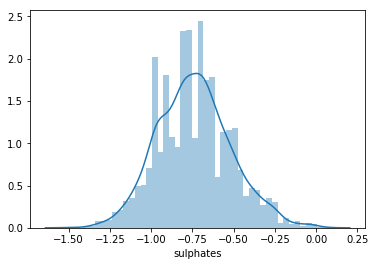

In [39]:
sns.distplot(np.log(all_data['sulphates']))### Log transformation to check for more normal  distribution

In [45]:
from scipy.stats import skew
numeric_features = [f for f in all_data.columns if all_data[f].dtype != object]
skewed = all_data[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))

In [48]:
skewed

fixed acidity           0.647553
volatile acidity        1.576497
citric acid             1.281528
residual sugar          1.076764
chlorides               5.021792
free sulfur dioxide     1.406314
total sulfur dioxide    0.390590
density                 0.977474
pH                      0.457642
sulphates               0.976894
alcohol                 0.487193
quality                 0.155749
dtype: float64

In [49]:
skewed = skewed[skewed > 0.75]
skewed = skewed.index
all_data[skewed] = np.log1p(all_data[skewed])

In [50]:
all_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.239017,0.307485,3.077312,0.044017,3.828641,170.0,0.693647,3.00,0.371564,8.800000,6
1,6.3,0.262364,0.292670,0.955511,0.047837,2.708050,132.0,0.690143,3.30,0.398776,9.500000,6
2,8.1,0.246860,0.336472,2.066863,0.048790,3.433987,97.0,0.690694,3.26,0.364643,10.100000,6
3,7.2,0.207014,0.277632,2.251292,0.056380,3.871201,186.0,0.690945,3.19,0.336472,9.900000,6
4,7.2,0.207014,0.277632,2.251292,0.056380,3.871201,186.0,0.690945,3.19,0.336472,9.900000,6
5,8.1,0.246860,0.336472,2.066863,0.048790,3.433987,97.0,0.690694,3.26,0.364643,10.100000,6
6,6.2,0.277632,0.148420,2.079442,0.044017,3.433987,136.0,0.690594,3.18,0.385262,9.600000,6
7,7.0,0.239017,0.307485,3.077312,0.044017,3.828641,170.0,0.693647,3.00,0.371564,8.800000,6
8,6.3,0.262364,0.292670,0.955511,0.047837,2.708050,132.0,0.690143,3.30,0.398776,9.500000,6
9,8.1,0.198851,0.357674,0.916291,0.043059,3.367296,129.0,0.690042,3.22,0.371564,11.000000,6


In [51]:
numeric_features.remove('quality')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(all_data[numeric_features])
scaled = scaler.transform(all_data[numeric_features])

for i, col in enumerate(numeric_features):
       all_data[col] = scaled[:,i]


In [55]:
labels=all_data['quality']
del all_data['quality']


In [57]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_data, labels, test_size=0.2, random_state=20)

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

0.7750108419797955